In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
tel=pd.read_csv("C:/sprint accelerator/Bank Campaign/bank-additional/bank-additional/bank-additional-full.csv",sep=';')

In [4]:
tel.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
tel.shape

(41188, 21)

In [8]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

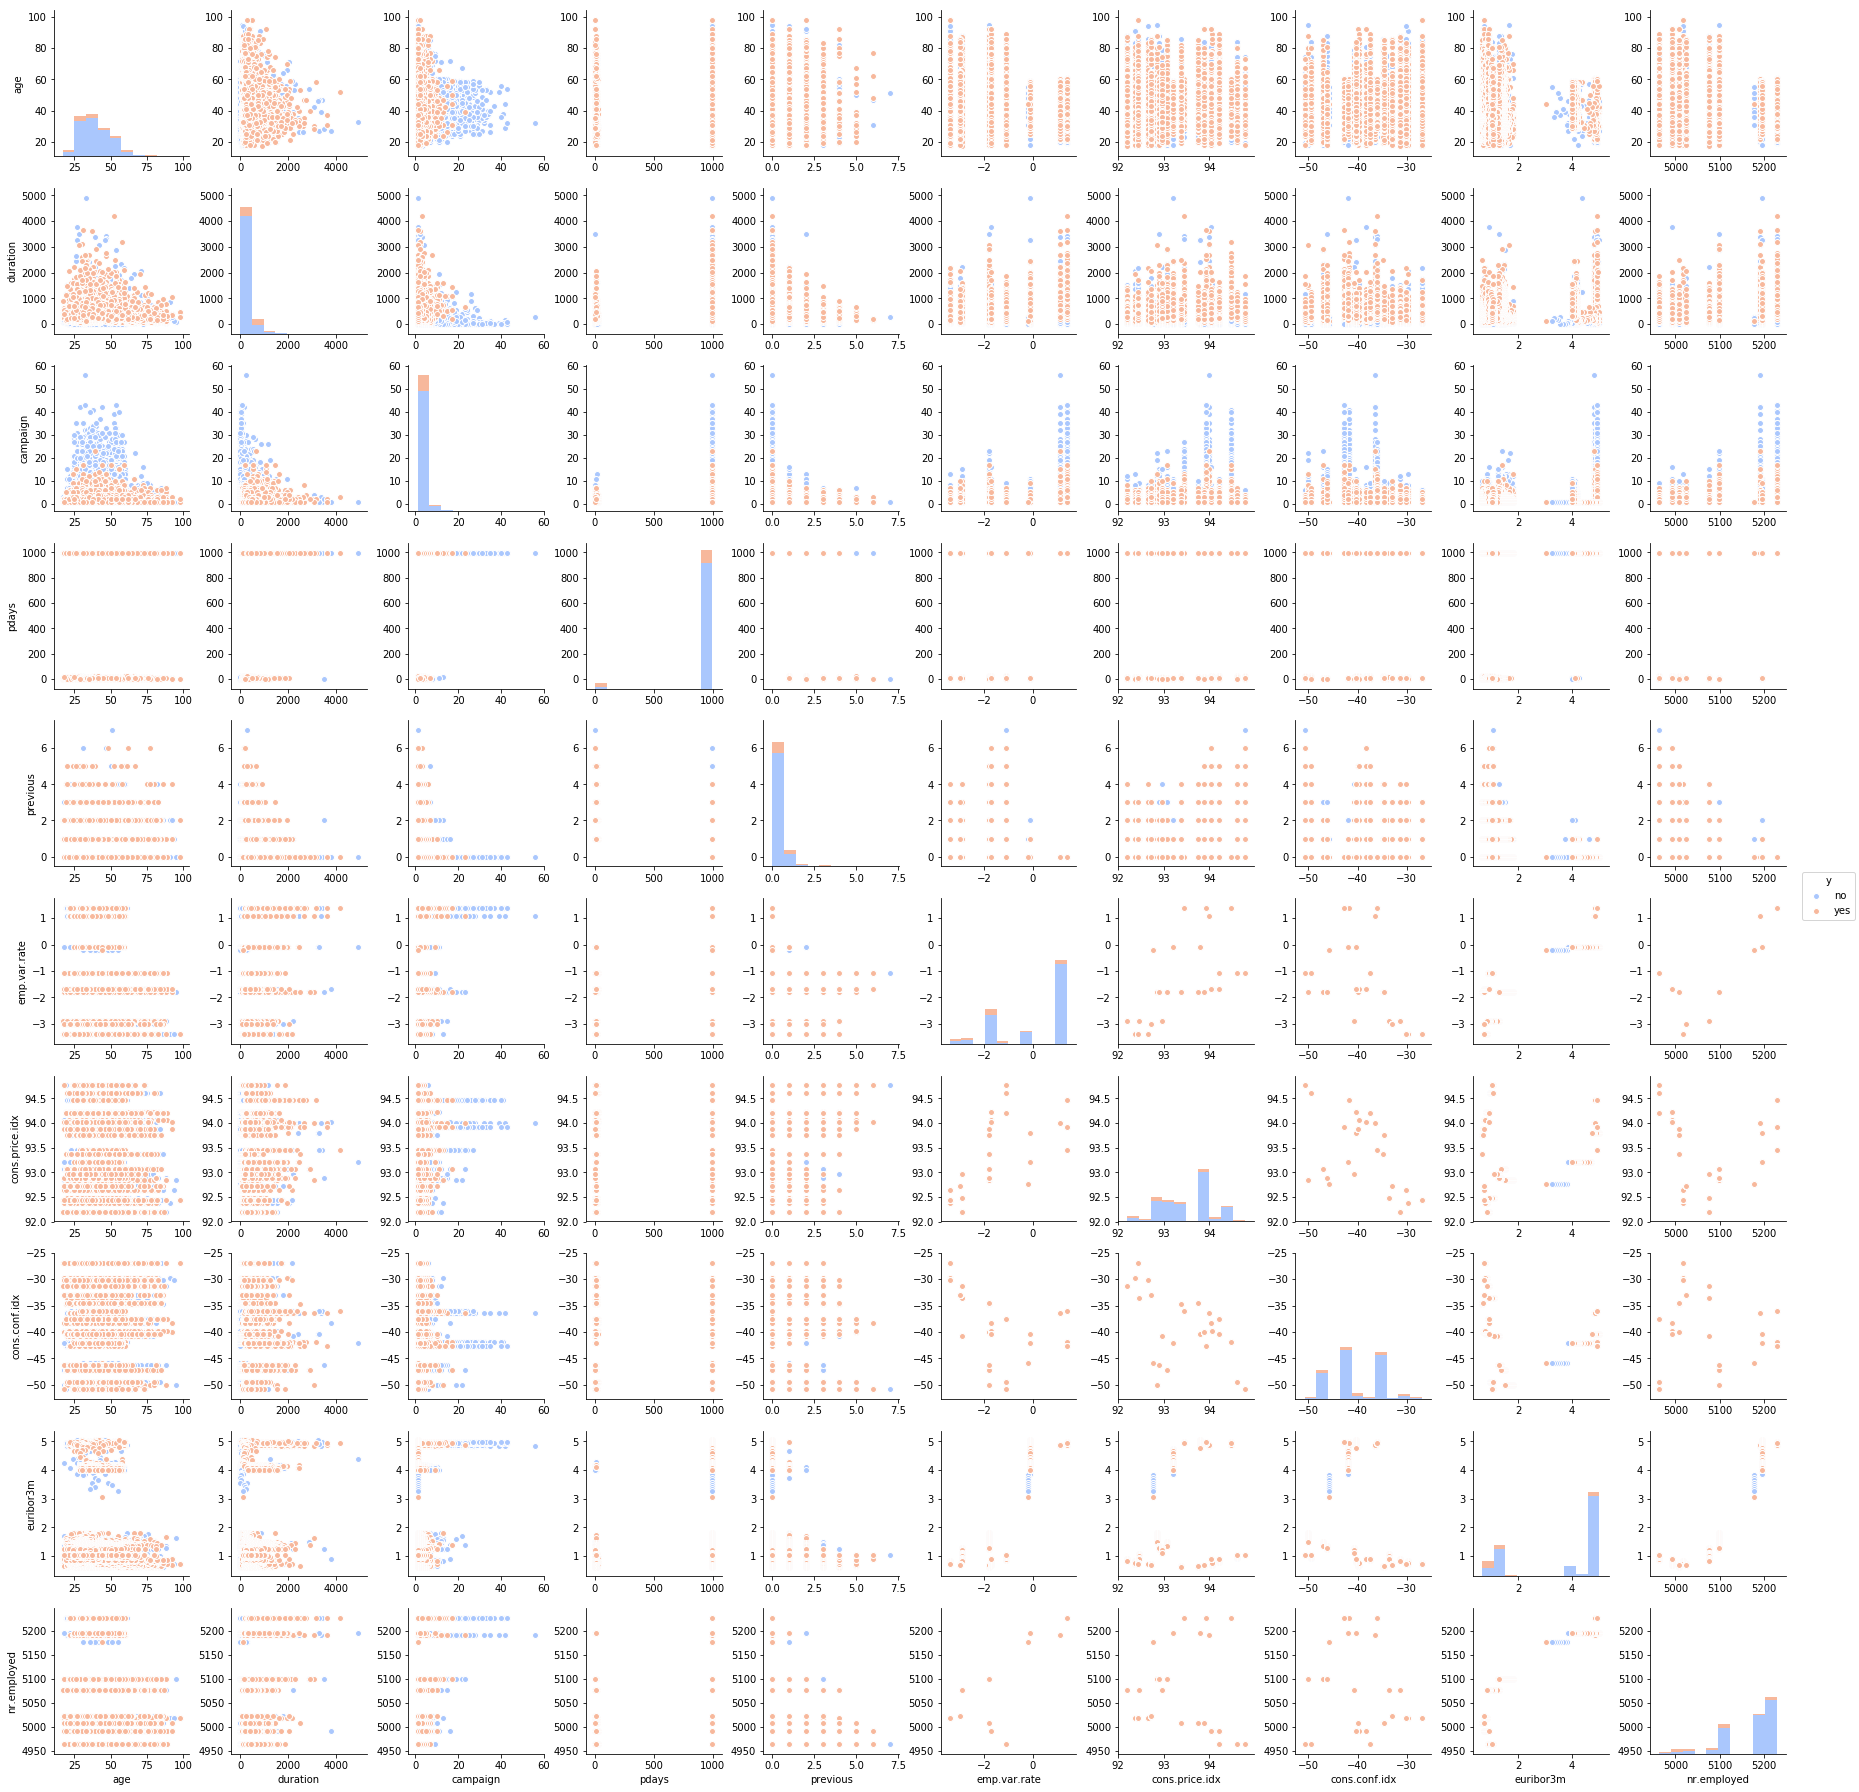

In [13]:
sns.pairplot(tel,hue='y',palette='coolwarm')

In [9]:
tel.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

Summary Statistics

In [11]:
tel.describe()  ### Quantitative Data

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)


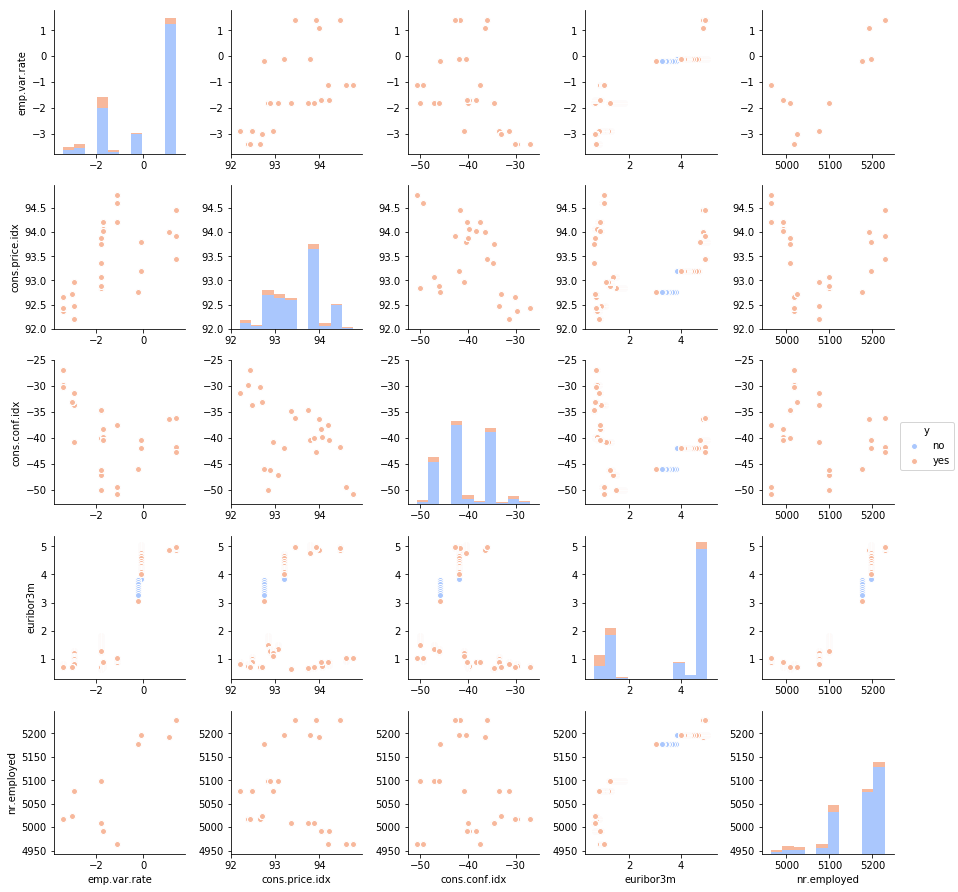

In [22]:
### Subset social and economic dataset
tempdf=tel[['emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed', 'y']]
sns.pairplot(tempdf,hue='y',palette='coolwarm')

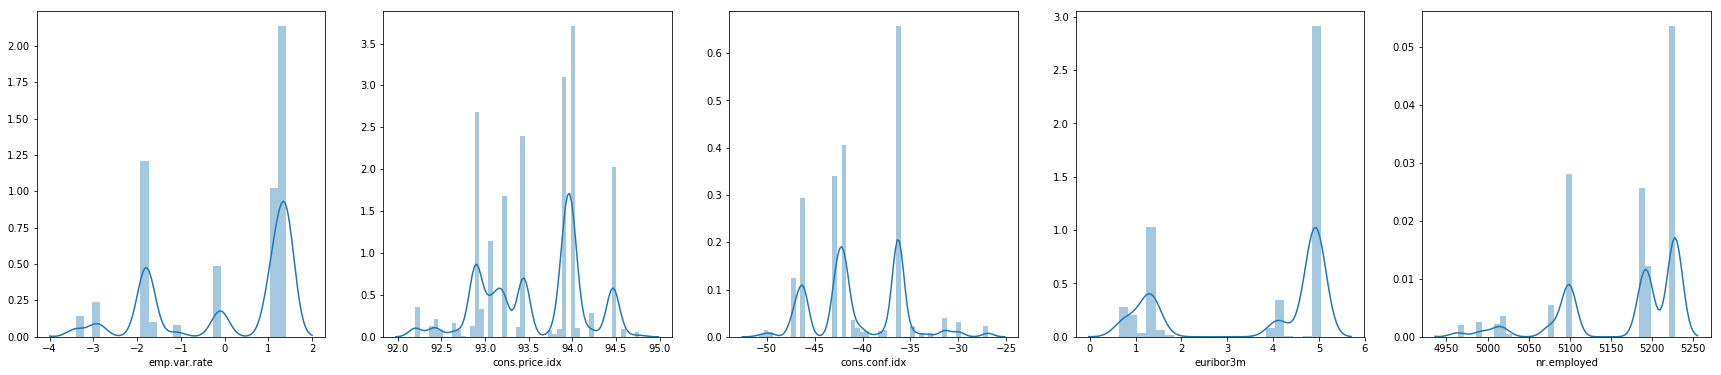

In [95]:
### Visualize five economic and social data elements
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5,figsize=(30,6))
sns.distplot(tel['emp.var.rate'],ax=ax1)
sns.distplot(tel['cons.price.idx'],ax=ax2)
sns.distplot(tel['cons.conf.idx'],ax=ax3)
sns.distplot(tel['euribor3m'],ax=ax4)
sns.distplot(tel['nr.employed'],ax=ax5)
#plt.show()
plt.savefig("SocialEcomonicsVariablesDistribution.jpg")



In [97]:
### Separate dataframe based on the response variable (yes/no)
tel_yes=tel[tel['y']=='yes']
tel_no=tel[tel['y']=='no']
tel_yes.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes


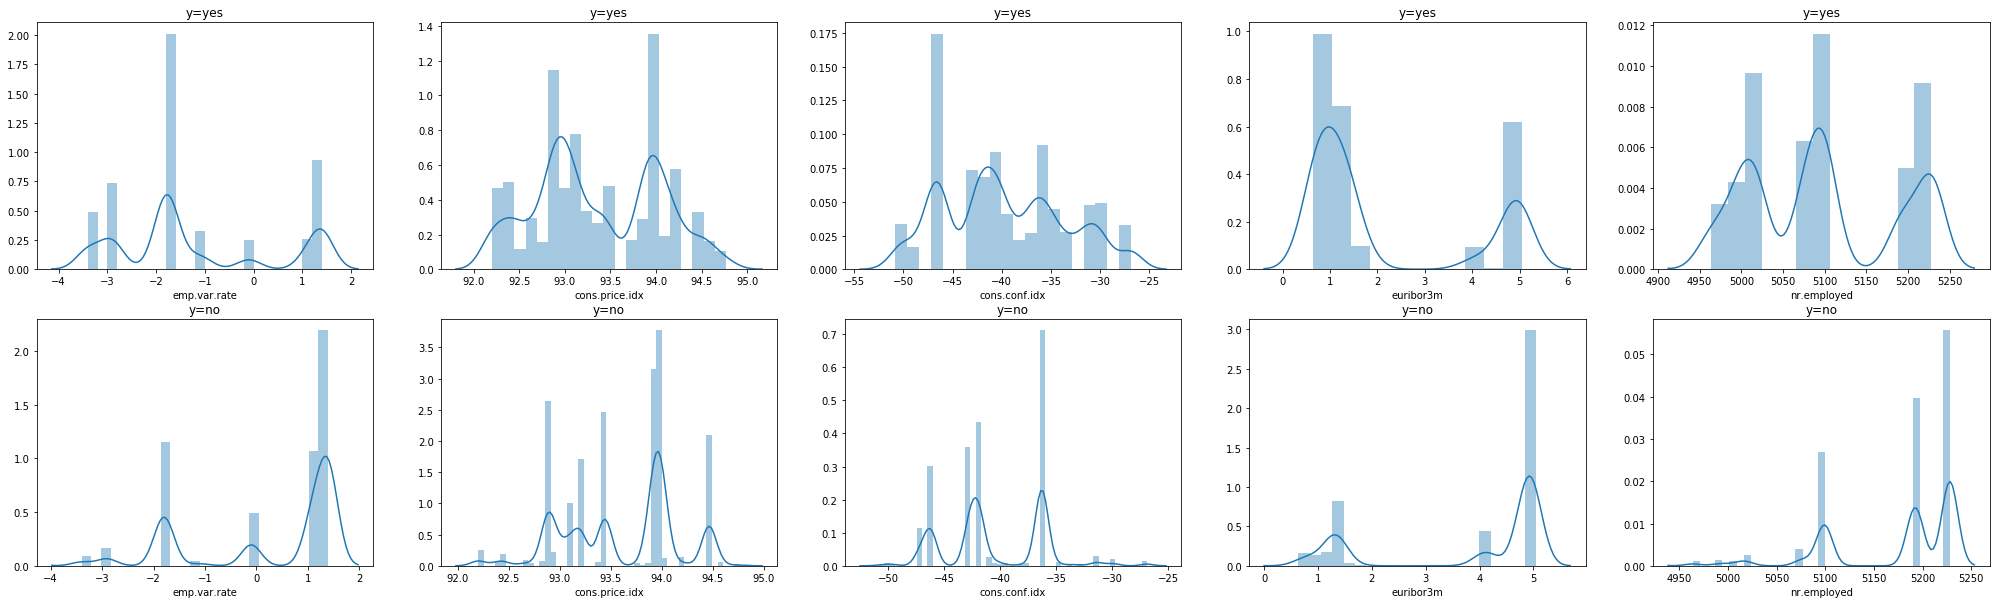

In [117]:
#### Create two groups economic social variables distribution 
fig, ((ax1, ax2, ax3, ax4, ax5),(ax6,ax7,ax8,ax9,ax10)) = plt.subplots(2,5,figsize=(35,10))
sns.distplot(tel_yes['emp.var.rate'],ax=ax1)
ax1.set_title('y=yes')
sns.distplot(tel_yes['cons.price.idx'],ax=ax2,label='y=yes')
ax2.set_title('y=yes')
sns.distplot(tel_yes['cons.conf.idx'],ax=ax3,label='y=yes')
ax3.set_title('y=yes')
sns.distplot(tel_yes['euribor3m'],ax=ax4,label='y=yes')
ax4.set_title('y=yes')
sns.distplot(tel_yes['nr.employed'],ax=ax5,label='y=yes')
ax5.set_title('y=yes')

sns.distplot(tel_no['emp.var.rate'],ax=ax6,label='y=no')
ax6.set_title('y=no')
sns.distplot(tel_no['cons.price.idx'],ax=ax7,label='y=no')
ax7.set_title('y=no')
sns.distplot(tel_no['cons.conf.idx'],ax=ax8,label='y=no')
ax8.set_title('y=no')
sns.distplot(tel_no['euribor3m'],ax=ax9,label='y=no')
ax9.set_title('y=no')
sns.distplot(tel_no['nr.employed'],ax=ax10,label='y=no')
ax10.set_title('y=no')

plt.savefig("SocialEcomonicsVariablesDistribution_Sep_y.jpg")

C:\Users\soloz\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


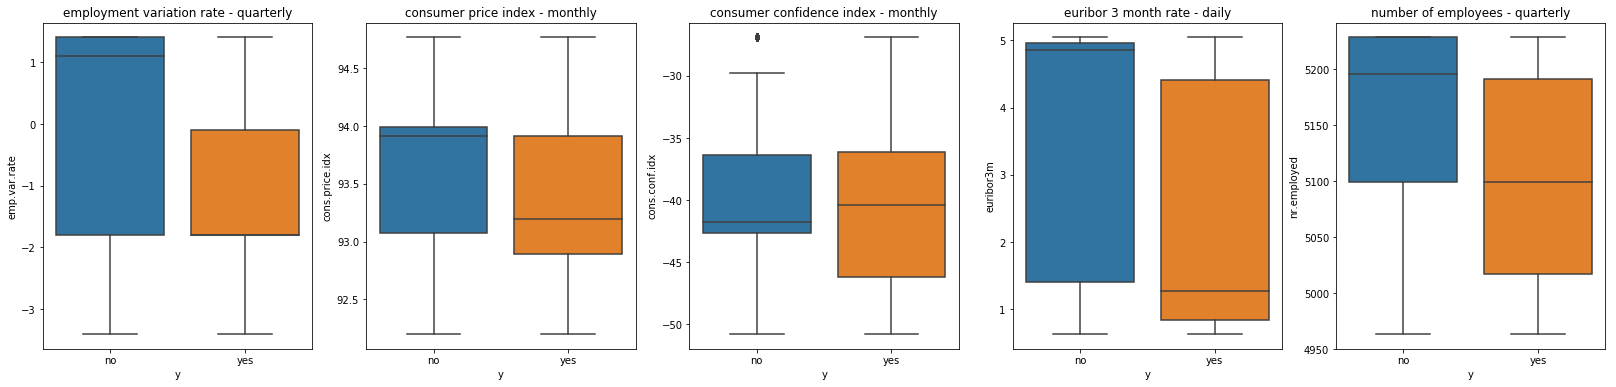

In [121]:
### Create boxplots 
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5,figsize=(28,6))

sns.boxplot(x="y", y="emp.var.rate", data=tel, ax=ax1)
ax1.set_title('employment variation rate - quarterly')


sns.boxplot(x="y", y="cons.price.idx", data=tel, ax=ax2)
ax2.set_title('consumer price index - monthly')


sns.boxplot(x="y", y="cons.conf.idx", data=tel, ax=ax3)
ax3.set_title('consumer confidence index - monthly')

sns.boxplot(x="y", y="euribor3m", data=tel, ax=ax4)
ax4.set_title('euribor 3 month rate - daily')

sns.boxplot(x="y", y="nr.employed", data=tel, ax=ax5)
ax5.set_title('number of employees - quarterly')

plt.savefig("SocialBoxPlot.jpeg")

C:\Users\soloz\Anaconda3\lib\site-packages\seaborn\categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\Users\soloz\Anaconda3\lib\site-packages\seaborn\categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


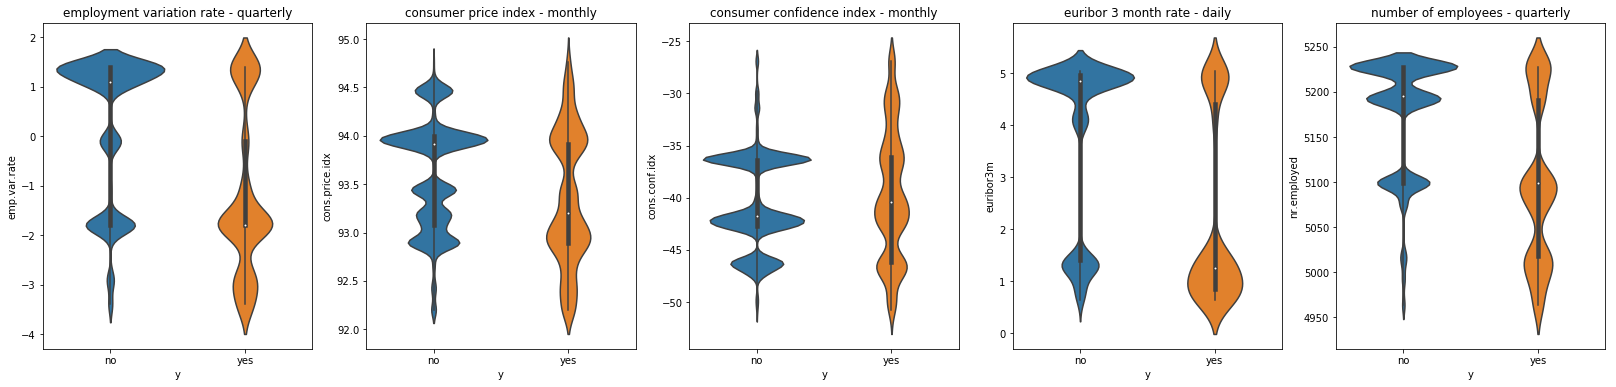

In [122]:
#### Create violin plots
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5,figsize=(28,6))

sns.violinplot(x="y", y="emp.var.rate", data=tel, ax=ax1)
ax1.set_title('employment variation rate - quarterly')

sns.violinplot(x="y", y="cons.price.idx", data=tel, ax=ax2)
ax2.set_title('consumer price index - monthly')

sns.violinplot(x="y", y="cons.conf.idx", data=tel, ax=ax3)
ax3.set_title('consumer confidence index - monthly')


sns.violinplot(x="y", y="euribor3m", data=tel, ax=ax4)
ax4.set_title('euribor 3 month rate - daily')

sns.violinplot(x="y", y="nr.employed", data=tel, ax=ax5)
ax5.set_title('number of employees - quarterly')

plt.savefig("SocialEconomicViolin.jpeg")